# The Weather Project

## Experimentdesign
Es soll ein **faktorielles Feldexperiment** mit **within-group design** durchgeführt werden, in dem **zwei Faktoren** manipuliert werden, um deren Einfluss auf die Prognosegüte zu untersuchen.  

Der **erste Faktor** ist das Wetterportal mit **drei Stufen** (weather.com, wetter.com und accuweather.com).  

D*r** zweite Fak*o**r ist der Prognosehorizont m*t** drei Stu*e**n (1, 3 und 7 Tag).  


Jede Untersuchungseinheit **r**d 3x3=9 Experimentkondit**n**en ausgesetzt. Die Reihenfolge der Konditionen ist nicht von Bedeutung (d.h. keine randomisierte Zuordnung erforderlh.  

 
Die abhängigen Variablen werden im Anschluss ges**s**en (post-test only s****i).


## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Wettervorhersagen zum Stuttgarter Flughafen
accuweather_str = pd.read_excel('daten_accuweather.xlsx', header=1, sheet_name="Stuttgart")
accuweather_str["Datum"] = pd.to_datetime(accuweather_str["Datum"])
weather_str = pd.read_excel('daten_weather_com.xlsx', header=1, sheet_name="Stuttgart")
weather_str["Datum"] = pd.to_datetime(weather_str["Datum"])
wetter_str = pd.read_excel('Wetter_com_daten.xlsx', header=0, sheet_name="Stuttgart")
wetter_str["Datum"] = pd.to_datetime(wetter_str["Datum"])

In [4]:
# Wettervorhersagen für Manaus
accuweather_man = pd.read_excel('daten_accuweather.xlsx', header=1, sheet_name="Manaus")
accuweather_man["Datum"] = pd.to_datetime(accuweather_man["Datum"])
weather_man = pd.read_excel('daten_weather_com.xlsx', header=1, sheet_name="Manaus")
weather_man["Datum"] = pd.to_datetime(weather_man["Datum"])
wetter_man = pd.read_excel('Wetter_com_daten.xlsx', header=0, sheet_name="Manaus")
wetter_man["Datum"] = pd.to_datetime(wetter_man["Datum"])

In [5]:
# Wettervorhersagen für Juneau
accuweather_jun = pd.read_excel('daten_accuweather.xlsx', header=1, sheet_name="Juneau")
accuweather_jun["Datum"] = pd.to_datetime(accuweather_jun["Datum"])
weather_jun = pd.read_excel('daten_weather_com.xlsx', header=1, sheet_name="Juneau")
weather_jun["Datum"] = pd.to_datetime(weather_jun["Datum"])
wetter_jun = pd.read_excel('Wetter_com_daten.xlsx', header=0, sheet_name="Juneau")
wetter_jun["Datum"] = pd.to_datetime(wetter_jun["Datum"])

In [6]:
print(wetter_str.head())

       Datum Tageszeit  Tage  Min Temperatur  Max Temperatur  \
0 2023-11-20   Morgens     1               7              11   
1 2023-11-20   Morgens     3               0               3   
2 2023-11-20   Morgens     7               6               9   
3 2023-11-20    Abends     1               7              11   
4 2023-11-20    Abends     3               0               4   

   Niederschlagswahrscheinlichkeit  Windgeschwindigkeit Windrichtung  
0                               90                   13           SW  
1                               20                    6            N  
2                               90                   16           SW  
3                               90                   12           SW  
4                               15                    6            N  


Realdaten Spalten:
date	tmin	tmax	prcp	wdir	wspd


In [7]:
# Realdaten
real_str = pd.read_excel('real_str.xlsx', usecols=["date", "tmin", "tmax", "prcp", "wdir", "wspd"], header=0)
real_str["date"] = pd.to_datetime(real_str["date"])
real_man = pd.read_excel('real_man.xlsx', usecols=["date", "tmin", "tmax", "prcp", "wdir", "wspd"], header=0)
real_man["date"] = pd.to_datetime(real_man["date"])
real_jun = pd.read_excel('real_jun.xlsx', usecols=["date", "tmin", "tmax", "prcp", "wdir", "wspd"], header=0)
real_jun["date"] = pd.to_datetime(real_jun["date"])

In [8]:
dataframes = [[accuweather_str, weather_str, wetter_str],[accuweather_man, weather_man, wetter_man],[accuweather_jun, weather_jun, wetter_jun]]
for x in dataframes:
    for y in x:
        #adding forecast day
        y["fc_date"] = y["Datum"] + pd.to_timedelta(y['Tage'], unit='D')
        y["dayofmonth"] = y["fc_date"].dt.day
        y["month"] = y["fc_date"].dt.month

## Plotting

In [9]:
# start and end of real data needed
start_date_1 = pd.to_datetime('2023-11-21')
end_date_1 = pd.to_datetime('2023-12-04')

start_date_3 = pd.to_datetime('2023-11-23')
end_date_3 = pd.to_datetime('2023-12-06')

start_date_7 = pd.to_datetime('2023-11-27')
end_date_7 = pd.to_datetime('2023-12-10')

filtered_real = [None, None, None]
wetter = [None, None, None, None, None, None]
weather = [None, None, None, None, None, None]
accuweather = [None, None, None, None, None, None]
# Filter the DataFrame based on the date range
filtered_real[0] = real_str[(real_str['date'] >= start_date_1) & (real_str['date'] <= end_date_1)]
filtered_real[1] = real_str[(real_str['date'] >= start_date_3) & (real_str['date'] <= end_date_3)]
filtered_real[2] = real_str[(real_str['date'] >= start_date_7) & (real_str['date'] <= end_date_7)]

#wetter.com
wetter[0] = wetter_str[(wetter_str['Tage'] == 1) & (wetter_str['Tageszeit']=="Morgens")]
wetter[1] = wetter_str[(wetter_str['Tage'] == 1) & (wetter_str['Tageszeit']=="Abends")]
wetter[2] = wetter_str[(wetter_str['Tage'] == 3) & (wetter_str['Tageszeit']=="Morgens")]
wetter[3] = wetter_str[(wetter_str['Tage'] == 3) & (wetter_str['Tageszeit']=="Abends")]
wetter[4] = wetter_str[(wetter_str['Tage'] == 7) & (wetter_str['Tageszeit']=="Morgens")]
wetter[5] = wetter_str[(wetter_str['Tage'] == 7) & (wetter_str['Tageszeit']=="Abends")]

#weather.com
weather[0] = weather_str[(wetter_str['Tage'] == 1) & (weather_str['Tageszeit']=="Morgens")]
weather[1] = weather_str[(wetter_str['Tage'] == 1) & (weather_str['Tageszeit']=="Abends")]
weather[2] = weather_str[(wetter_str['Tage'] == 3) & (weather_str['Tageszeit']=="Morgens")]
weather[3] = weather_str[(wetter_str['Tage'] == 3) & (weather_str['Tageszeit']=="Abends")]
weather[4] = weather_str[(wetter_str['Tage'] == 7) & (weather_str['Tageszeit']=="Morgens")]
weather[5] = weather_str[(wetter_str['Tage'] == 7) & (weather_str['Tageszeit']=="Abends")]

#accuweather
accuweather[0] = accuweather_str[(wetter_str['Tage'] == 1) & (accuweather_str['Tageszeit']=="Morgens")]
accuweather[1] = accuweather_str[(wetter_str['Tage'] == 1) & (accuweather_str['Tageszeit']=="Abends")]
accuweather[2] = accuweather_str[(wetter_str['Tage'] == 3) & (accuweather_str['Tageszeit']=="Morgens")]
accuweather[3] = accuweather_str[(wetter_str['Tage'] == 3) & (accuweather_str['Tageszeit']=="Abends")]
accuweather[4] = accuweather_str[(wetter_str['Tage'] == 7) & (accuweather_str['Tageszeit']=="Morgens")]
accuweather[5] = accuweather_str[(wetter_str['Tage'] == 7) & (accuweather_str['Tageszeit']=="Abends")]

#output dataframe with all parameters
full_df = pd.DataFrame()

#combining forecast and real data based on date
for slice in range(6):
    weather[slice]["provider"] = "weather.com"
    wetter[slice]["provider"] = "wetter.com"
    accuweather[slice]["provider"] = "accuweather.com"
    
    new_frame = [None, None, None]
    new_frame[0] = pd.concat([wetter[slice].set_index('fc_date'), filtered_real[int(slice/2)].set_index('date')], axis=1)
    new_frame[1] = pd.concat([weather[slice].set_index('fc_date'), filtered_real[int(slice/2)].set_index('date')], axis=1)
    new_frame[2] = pd.concat([accuweather[slice].set_index('fc_date'), filtered_real[int(slice/2)].set_index('date')], axis=1)
    for i in new_frame:
        i["x"] = range(1, len(i) + 1)
        i = i.reset_index(drop=True)
        if full_df.empty:
            full_df = pd.DataFrame(i)
        else:
            full_df = pd.concat([full_df,i], ignore_index=True)

C:\Users\Jonas\AppData\Local\Temp\ipykernel_114348\611387460.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather[slice]["provider"] = "weather.com"
C:\Users\Jonas\AppData\Local\Temp\ipykernel_114348\611387460.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wetter[slice]["provider"] = "wetter.com"
C:\Users\Jonas\AppData\Local\Temp\ipykernel_114348\611387460.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

### Stuttgart

In [10]:
def calcMae(df, value_prog, value_real):
    # Calculate the absolute error for each corresponding value
    df["absolute_error_" + value_real] = np.abs(df[value_prog] - df[value_real])
    # Calculate the mean absolute error (MAE)
    return df["absolute_error_" + value_real].mean()

In [11]:
def calcMse(df, value_prog, value_real):
    df["squared_error_" + value_real] = ((df[value_prog] - df[value_real]) ** 2)
    return df["squared_error_" + value_real].mean()

In [12]:
def calcRr(df, value_prog, value_real):
    # Calculate the absolute error for each corresponding value
    df['relative_error_' + value_real] = (df[value_prog] - df[value_real]) / df[value_real]
    # Calculate the mean absolute error (MAE)
    return None

In [13]:
def calcRae(df, value_prog, value_real):
    # Calculate the absolute error for each corresponding value
    df['relative_absolute_error_' + value_real] = abs(df[value_prog] - df[value_real]) / abs(df[value_real])
    # Calculate the mean absolute error (MAE)
    return None

In [14]:
value_mapping = {'tmin':'Min Temperatur', 'tmax':'Max Temperatur', 'prcp':'Niederschlagswahrscheinlichkeit', 'wspd':'Windgeschwindigkeit'}
for value in ['tmin', 'tmax', 'prcp', 'wspd']:
    print(calcMae(full_df, value_mapping[value], value))
    print(calcMse(full_df, value_mapping[value], value))
    calcRr(full_df, value_mapping[value], value)
    calcRae(full_df, value_mapping[value], value)

full_df.to_excel("output.xlsx")
print(full_df)

2.7761904761904765
13.467777777777778
1.6944444444444446
5.261666666666667
56.601587301587294
4186.105555555556
4.139682539682539
26.599206349206348


PermissionError: [Errno 13] Permission denied: 'output.xlsx'

### Mindest Temperatur Error

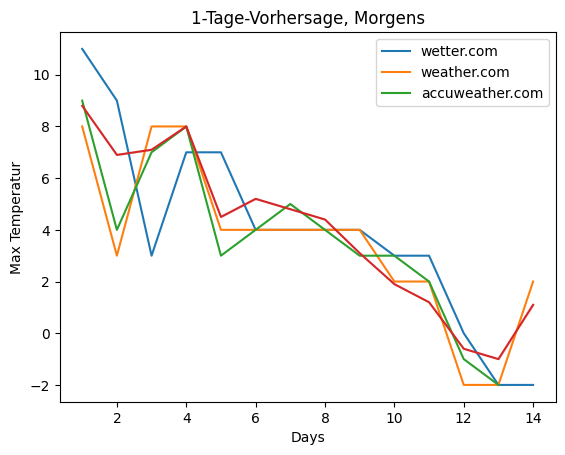

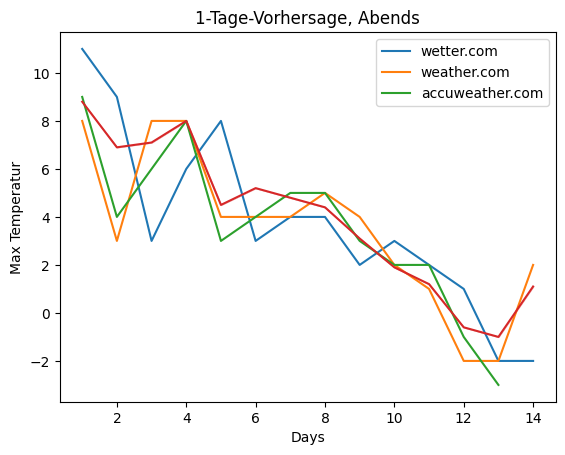

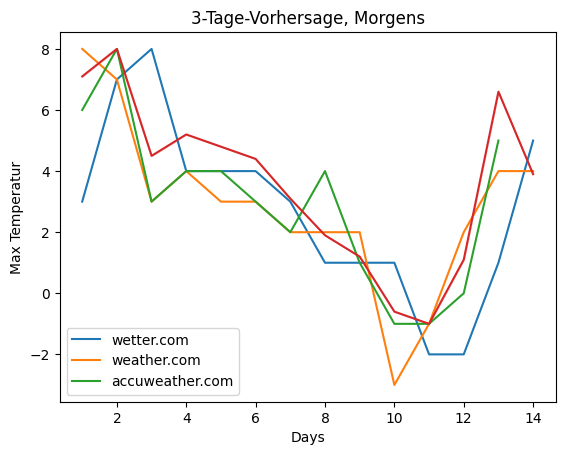

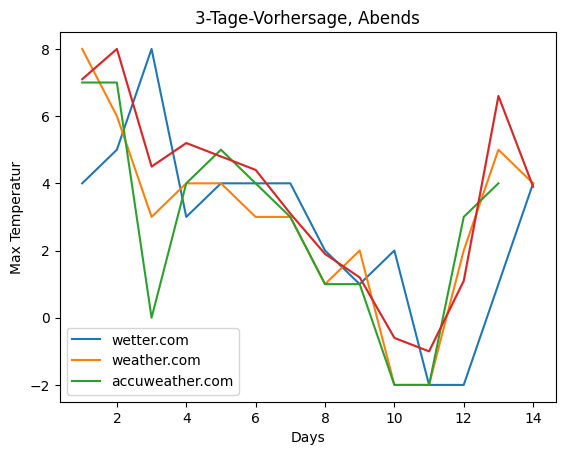

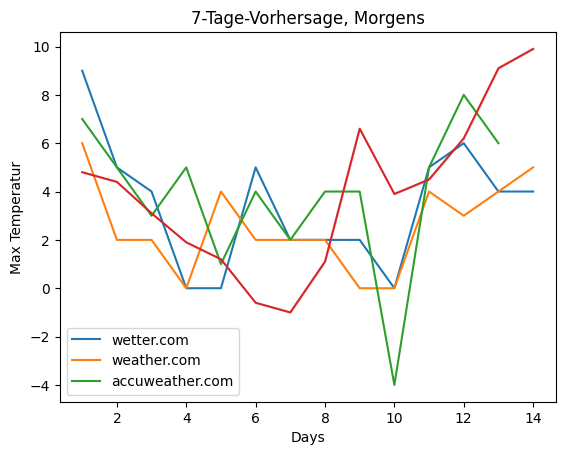

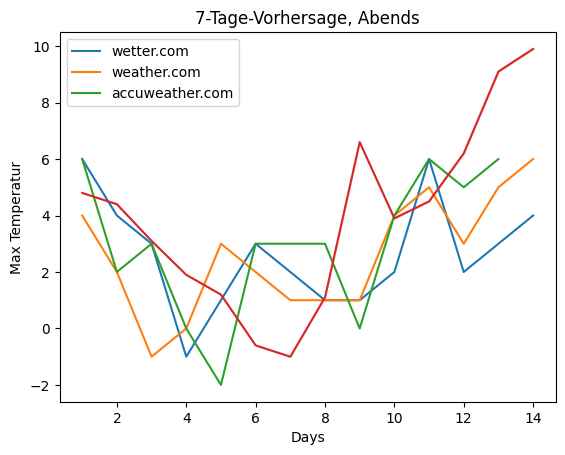

In [44]:
for i in range(6):
    sns.lineplot(data=full_df[i*42:i*42 + 41], x="x", hue="provider", y="Max Temperatur")
    sns.lineplot(data=full_df[i*42:i*42 + 41], x="x", y="tmax")
    plt.title(str(full_df.loc[i*42, "Tage"]) + "-Tage-Vorhersage, " + full_df.loc[i*42, "Tageszeit"])
    plt.xlabel('Days')
    plt.show()

### Maximal Temperatur

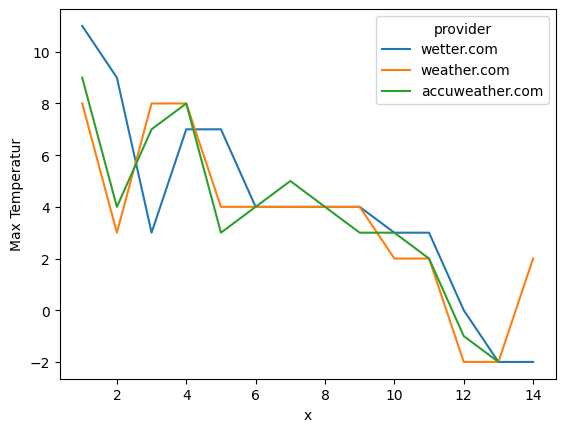

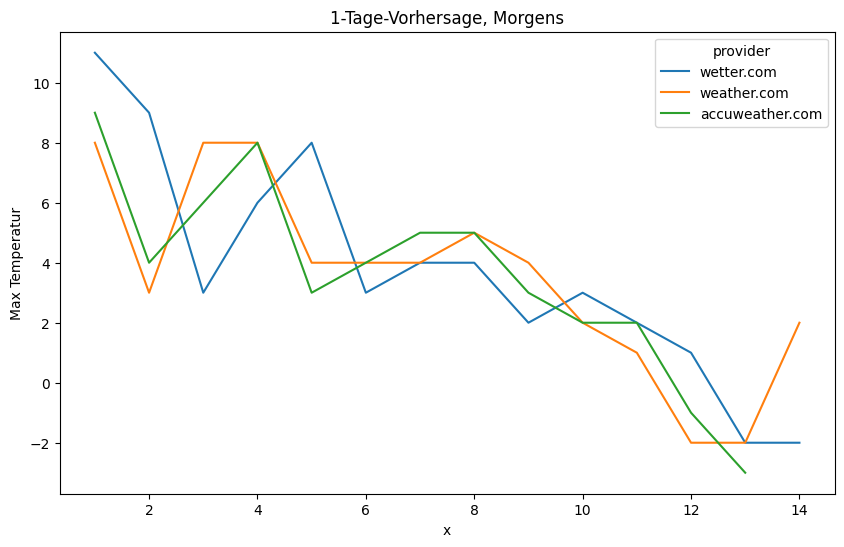

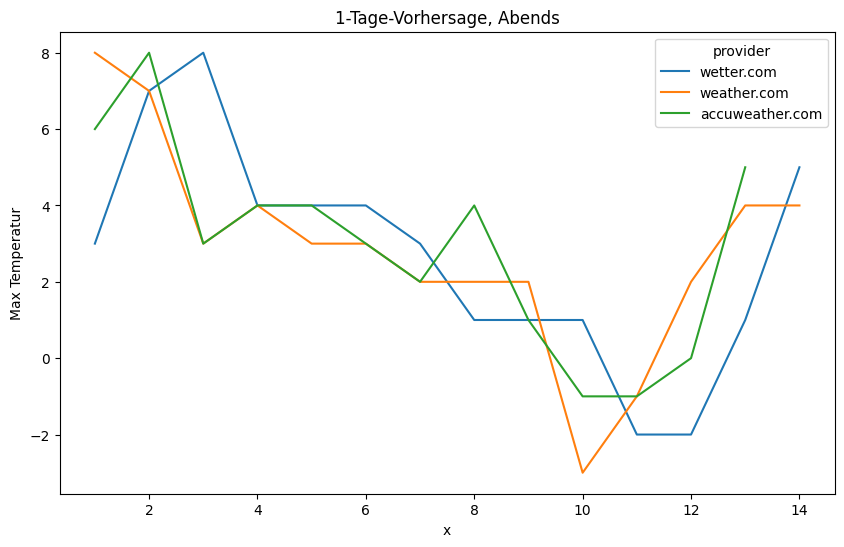

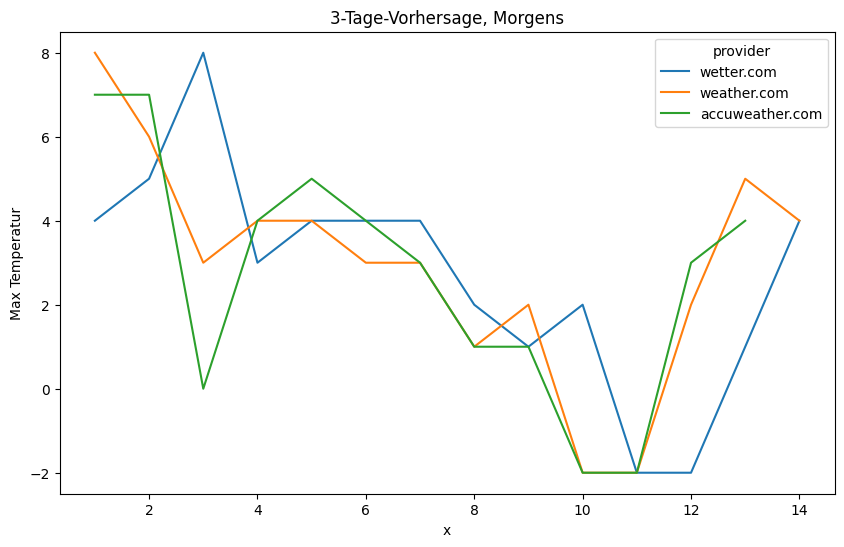

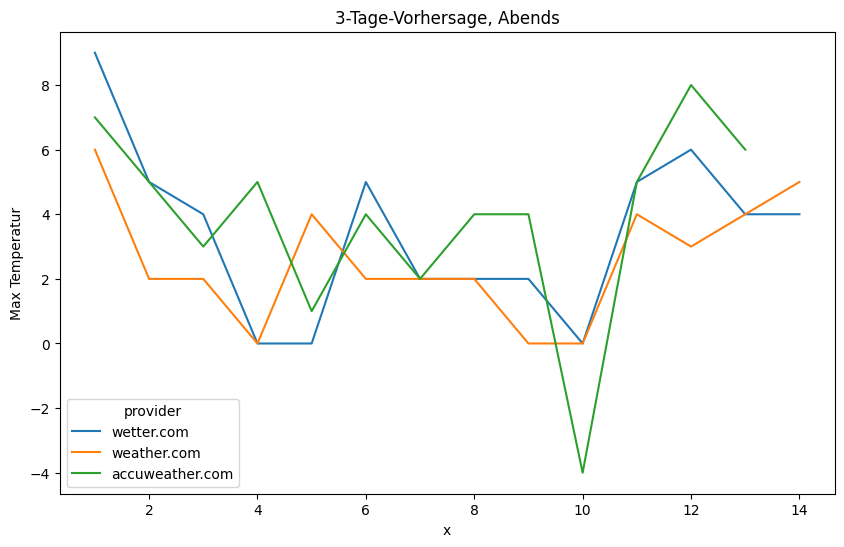

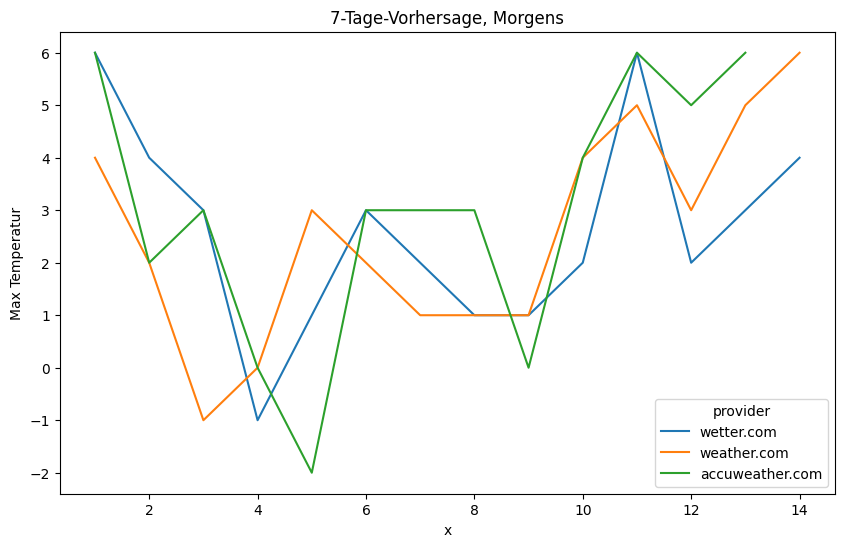

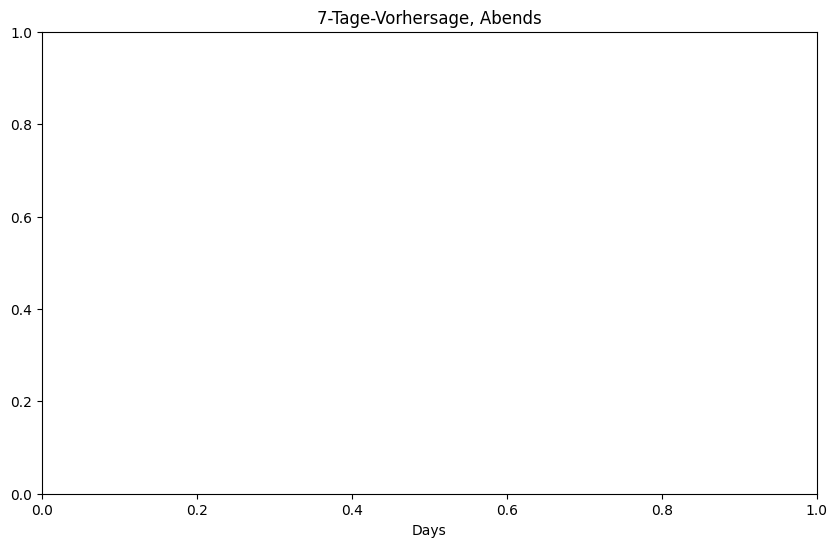

In [41]:
for i in range(6):
    sns.lineplot(data=full_df[i*42:i*42 + 41], x="x", hue="provider", y="Max Temperatur")
    #sns.lineplot(data=full_df[i*42:i*42 + 41], x="x", hue="provider", y="Max Temperatur")
    plt.figure(figsize=(10, 6))
    plt.title(str(full_df.loc[i*42, "Tage"]) + "-Tage-Vorhersage, " + full_df.loc[i*42, "Tageszeit"])
plt.xlabel('Days')
plt.show()

In [ ]:
#print(wetter_str_comb[0])
plt.figure(figsize=(10, 6))
plt.xlabel('Error Rates')
plt.title('Error Rates Lineplot')
for frame in wetter_str_comb:
    sns.lineplot(data=frame, x="x", y="absolute_error")
    sns.lineplot(data=frame, x="x", y="squared_error")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel('Error Rates')
plt.title('Error Rates Heatmap')
for frame in wetter_str_comb:
    sns.heatmap(frame["absolute_error"], annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.show()

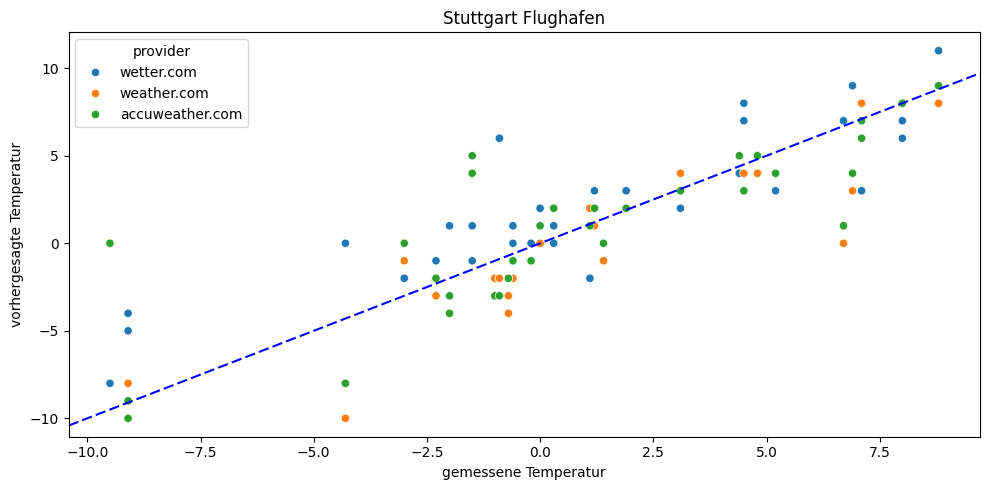

In [61]:
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=full_df[full_df['Tage'] == 1], x="tmax", y="Max Temperatur", hue="provider", ax=axs)
sns.scatterplot(data=full_df[full_df['Tage'] == 1], x="tmin", y="Min Temperatur", hue="provider",  legend=False, ax=axs)
axs.axline(xy1=(0,0), slope=1, color="b", dashes=(5, 2))
plt.xlabel('gemessene Temperatur')
plt.ylabel('vorhergesagte Temperatur')
plt.title('Stuttgart Flughafen')
f.tight_layout()

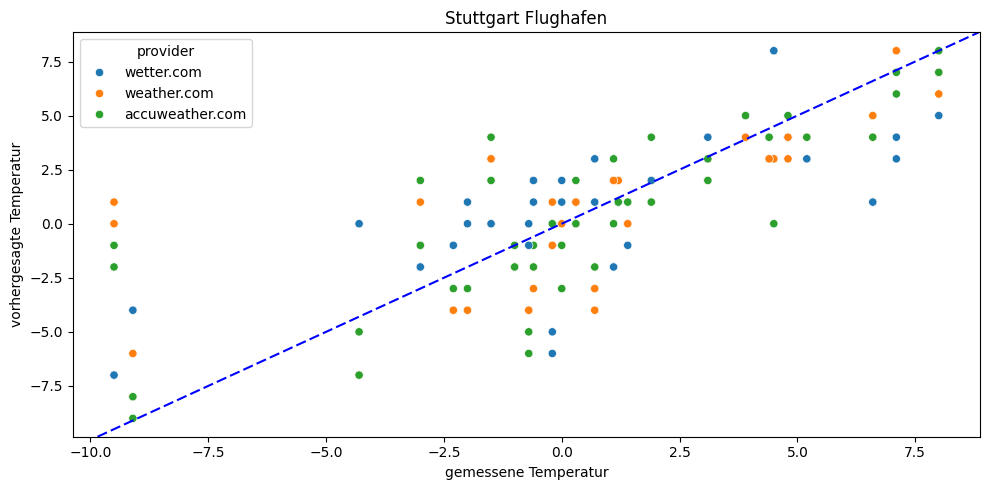

In [62]:
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=full_df[full_df['Tage'] == 3], x="tmax", y="Max Temperatur", hue="provider", ax=axs)
sns.scatterplot(data=full_df[full_df['Tage'] == 3], x="tmin", y="Min Temperatur", hue="provider",  legend=False, ax=axs)
axs.axline(xy1=(0,0), slope=1, color="b", dashes=(5, 2))
plt.xlabel('gemessene Temperatur')
plt.ylabel('vorhergesagte Temperatur')
plt.title('Stuttgart Flughafen')
f.tight_layout()

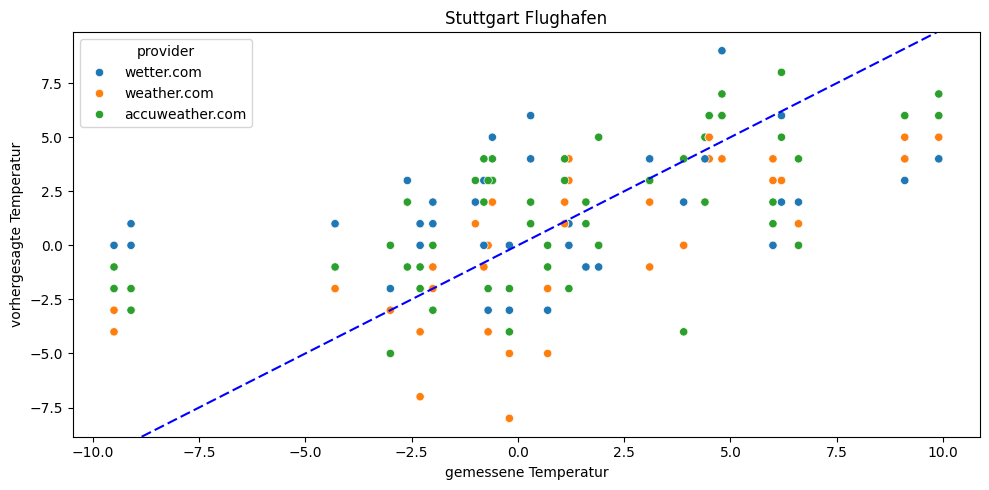

In [63]:
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=full_df[full_df['Tage'] == 7], x="tmax", y="Max Temperatur", hue="provider", ax=axs)
sns.scatterplot(data=full_df[full_df['Tage'] == 7], x="tmin", y="Min Temperatur", hue="provider",  legend=False, ax=axs)
axs.axline(xy1=(0,0), slope=1, color="b", dashes=(5, 2))
plt.xlabel('gemessene Temperatur')
plt.ylabel('vorhergesagte Temperatur')
plt.title('Stuttgart Flughafen')
f.tight_layout()

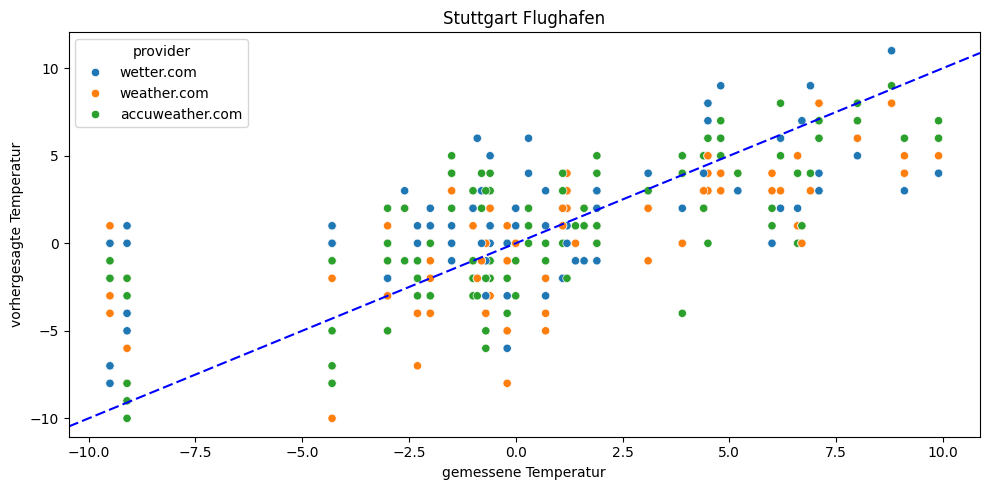

In [64]:
f, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.scatterplot(data=full_df, x="tmax", y="Max Temperatur", hue="provider", ax=axs)
sns.scatterplot(data=full_df, x="tmin", y="Min Temperatur", hue="provider",  legend=False, ax=axs)
axs.axline(xy1=(0,0), slope=1, color="b", dashes=(5, 2))
plt.xlabel('gemessene Temperatur')
plt.ylabel('vorhergesagte Temperatur')
plt.title('Stuttgart Flughafen')
f.tight_layout()